In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Dense
import numpy as np

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(34,(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(130,activation='relu'))
model.add(Dense(115,activation='relu'))
model.add(Dense(1,activation='relu'))

In [ ]:
model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.4, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/covid_data_updated/covid_data_updated/Train',target_size=(64,64),batch_size=10,class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/covid_data_updated/covid_data_updated/test',target_size=(64,64),batch_size=10,class_mode='binary')

In [ ]:
model.fit(training_set, steps_per_epoch = 20, epochs = 10)                               #steps_per_epoch is nothing but batch_size

Epoch 1/10
20/20 [==============================] - 37s 2s/step - loss: 1.6543 - accuracy: 0.4394
Epoch 2/10
20/20 [==============================] - 7s 339ms/step - loss: 1.4672 - accuracy: 0.4545
Epoch 3/10
20/20 [==============================] - 4s 178ms/step - loss: 1.4313 - accuracy: 0.4343
Epoch 4/10
20/20 [==============================] - 4s 203ms/step - loss: 1.2574 - accuracy: 0.4747
Epoch 5/10
20/20 [==============================] - 3s 157ms/step - loss: 1.2516 - accuracy: 0.4596
Epoch 6/10
20/20 [==============================] - 3s 162ms/step - loss: 1.1988 - accuracy: 0.4596
Epoch 7/10
20/20 [==============================] - 4s 202ms/step - loss: 1.1307 - accuracy: 0.4747
Epoch 8/10
20/20 [==============================] - 3s 165ms/step - loss: 1.1480 - accuracy: 0.4444
Epoch 9/10
20/20 [==============================] - 3s 158ms/step - loss: 1.0750 - accuracy: 0.4600
Epoch 10/10
20/20 [==============================] - 5s 236ms/step - loss: 1.0531 - accuracy: 0.4596


In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)

print('\n\n')
print('Test Loss: \t', test_loss, '\n')
print('Test Accuracy: \t', test_acc, '\n')

4/4 - 9s - loss: 1.4048 - accuracy: 0.2308 - 9s/epoch - 2s/step



Test Loss: 	 1.404827356338501 

Test Accuracy: 	 0.23076923191547394 



Transfer learning (we'll use the weights used by resnet)


RESNET model (gives the best kernel for the model)

In [ ]:
import tensorflow as tf

In [ ]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False,               #include_top should be false to not again train the model
                                                  input_shape=(64,64,3),
                                                  pooling = 'avg',classes=2,
                                                  weights = 'imagenet')
for layer in pretrained_model.layers:
  layer.trainable=False                                                             #layer.trainable = False do not train the model again by resnet

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(1,activation='sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

NameError: name 'resnet_model' is not defined

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.4, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/covid_data_updated/covid_data_updated/Train',target_size=(64,64),batch_size=10,class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/covid_data_updated/covid_data_updated/test',target_size=(64,64),batch_size=10,class_mode='binary')

Found 238 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [ ]:
resnet_model.fit(training_set, steps_per_epoch = 20, epochs = 10)

Epoch 1/10
20/20 [==============================] - 11s 369ms/step - loss: 0.6853 - accuracy: 0.5556
Epoch 2/10
20/20 [==============================] - 5s 232ms/step - loss: 0.6895 - accuracy: 0.5202
Epoch 3/10
20/20 [==============================] - 5s 234ms/step - loss: 0.6841 - accuracy: 0.5707
Epoch 4/10
20/20 [==============================] - 7s 328ms/step - loss: 0.6858 - accuracy: 0.5450
Epoch 5/10
20/20 [==============================] - 5s 229ms/step - loss: 0.6865 - accuracy: 0.5455
Epoch 6/10
20/20 [==============================] - 6s 270ms/step - loss: 0.6889 - accuracy: 0.5303
Epoch 7/10
20/20 [==============================] - 5s 242ms/step - loss: 0.6862 - accuracy: 0.5404
Epoch 8/10
20/20 [==============================] - 7s 339ms/step - loss: 0.6922 - accuracy: 0.5101
Epoch 9/10
20/20 [==============================] - 5s 235ms/step - loss: 0.6871 - accuracy: 0.5404
Epoch 10/10
20/20 [==============================] - 7s 341ms/step - loss: 0.6890 - accuracy: 0.525

In [ ]:
test_loss, test_acc = resnet_model.evaluate(test_set, verbose=2)

print('\n\n')
print('Test Loss: \t', test_loss, '\n')
print('Test Accuracy: \t', test_acc, '\n')

4/4 - 2s - loss: 0.6758 - accuracy: 0.7692 - 2s/epoch - 545ms/step



Test Loss: 	 0.6757534146308899 

Test Accuracy: 	 0.7692307829856873 



After using resnet model, the accuracy is decreasing from .28 to .23

VGG model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg_model = Sequential()
base_model = VGG16(weights='imagenet',include_top=False, input_shape=(64,64,3))
base_model.trainable = False
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dense(1,activation='sigmoid'))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.4, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/covid_data_updated/covid_data_updated/Train',target_size=(64,64),batch_size=10,class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/covid_data_updated/covid_data_updated/test',target_size=(64,64),batch_size=10,class_mode='binary')

Found 238 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [ ]:
vgg_model.fit(training_set, steps_per_epoch = 20, epochs = 10)

Epoch 1/10
20/20 [==============================] - 14s 638ms/step - loss: 0.6837 - accuracy: 0.5455
Epoch 2/10
20/20 [==============================] - 11s 517ms/step - loss: 0.6913 - accuracy: 0.5202
Epoch 3/10
20/20 [==============================] - 13s 626ms/step - loss: 0.6884 - accuracy: 0.5303
Epoch 4/10
20/20 [==============================] - 10s 505ms/step - loss: 0.6681 - accuracy: 0.5707
Epoch 5/10
20/20 [==============================] - 13s 642ms/step - loss: 0.6559 - accuracy: 0.5700
Epoch 6/10
20/20 [==============================] - 11s 519ms/step - loss: 0.6339 - accuracy: 0.5909
Epoch 7/10
20/20 [==============================] - 13s 642ms/step - loss: 0.6627 - accuracy: 0.5707
Epoch 8/10
20/20 [==============================] - 12s 609ms/step - loss: 0.6564 - accuracy: 0.5556
Epoch 9/10
20/20 [==============================] - 13s 625ms/step - loss: 0.6528 - accuracy: 0.6010
Epoch 10/10
20/20 [==============================] - 10s 507ms/step - loss: 0.6419 - accura

In [ ]:
test_loss, test_acc = vgg_model.evaluate(test_set, verbose=2)

print('\n\n')
print('Test Loss: \t', test_loss, '\n')
print('Test Accuracy: \t', test_acc, '\n')

4/4 - 2s - loss: 0.6331 - accuracy: 0.7436 - 2s/epoch - 552ms/step



Test Loss: 	 0.6330793499946594 

Test Accuracy: 	 0.7435897588729858 



Accuracy is increased from .28 to .38 using VGG model

In [ ]:
!pip install lime
import lime
from lime import lime_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=0c71ca50db329a28909a5f65c58728f3b992c10d66f28394a1dd967050139e85
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
#print(type(test_set))
tmp1, tmp2 = next(test_set)
background = shap.utils.sample(tmp1,5)
explainer = shap.DeepExplainer(model, background)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [ ]:
sample_index = np.random.randint(0, background.shape[0])
sample_image = background[sample_index]

In [ ]:
!pip install lime shap
import shap
from skimage.segmentation import mark_boundaries

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(background[sample_index].astype('double'), model.predict, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step


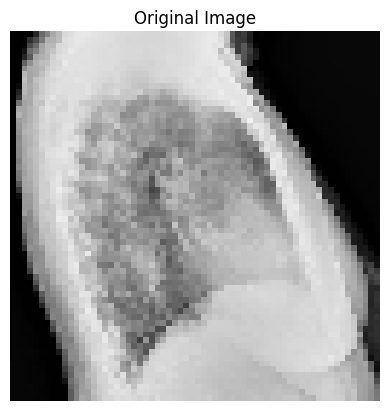

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(background[sample_index])
plt.title('Original Image')
plt.axis('off')
plt.show()

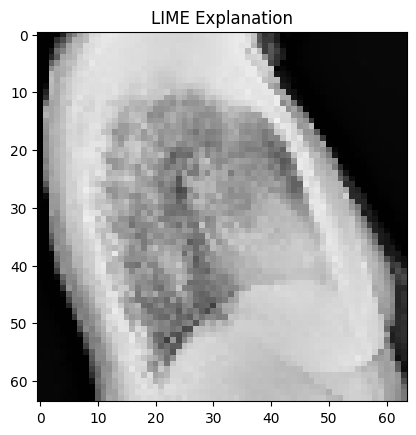

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.show()

In [ ]:
sample_image_batch = np.expand_dims(sample_image, axis=0)  # Add batch dimension
shap_values = explainer.shap_values(sample_image_batch)
sampled_images_array_scaled = sample_image_batch * 255
sampled_images_array_scaled = sampled_images_array_scaled.astype(np.uint8)

shap.image_plot(shap_values,sampled_images_array_scaled)
print(sampled_images_array_scaled.shape)
print(np.min(shap_values))
print(np.max(shap_values))

AttributeError: 'LimeImageExplainer' object has no attribute 'shap_values'